<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Binary-classification" data-toc-modified-id="Binary-classification-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Binary classification</a></span><ul class="toc-item"><li><span><a href="#Dataset" data-toc-modified-id="Dataset-1.1"><span class="toc-item-num">1.1&nbsp;&nbsp;</span>Dataset</a></span></li><li><span><a href="#辅助函数" data-toc-modified-id="辅助函数-1.2"><span class="toc-item-num">1.2&nbsp;&nbsp;</span>辅助函数</a></span></li></ul></li><li><span><a href="#Keras-Solving" data-toc-modified-id="Keras-Solving-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>Keras Solving</a></span><ul class="toc-item"><li><span><a href="#Model-define" data-toc-modified-id="Model-define-2.1"><span class="toc-item-num">2.1&nbsp;&nbsp;</span>Model define</a></span></li><li><span><a href="#Train-Model" data-toc-modified-id="Train-Model-2.2"><span class="toc-item-num">2.2&nbsp;&nbsp;</span>Train Model</a></span></li></ul></li><li><span><a href="#合成图片" data-toc-modified-id="合成图片-3"><span class="toc-item-num">3&nbsp;&nbsp;</span>合成图片</a></span></li><li><span><a href="#How-do-neural-networks-learn?" data-toc-modified-id="How-do-neural-networks-learn?-4"><span class="toc-item-num">4&nbsp;&nbsp;</span>How do neural networks learn?</a></span><ul class="toc-item"><li><span><a href="#Gradient-descent-visualization" data-toc-modified-id="Gradient-descent-visualization-4.1"><span class="toc-item-num">4.1&nbsp;&nbsp;</span>Gradient descent visualization</a></span></li><li><span><a href="#可视化" data-toc-modified-id="可视化-4.2"><span class="toc-item-num">4.2&nbsp;&nbsp;</span>可视化</a></span></li></ul></li></ul></div>

#  Binary classification 
> 参考： https://towardsdatascience.com/https-medium-com-piotr-skalski92-deep-dive-into-deep-networks-math-17660bc376ba

##  Dataset 

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib import cm
from sklearn.datasets import make_circles
from sklearn.model_selection import train_test_split
import keras
from keras.models import Sequential
from keras.layers import Dense
from keras.utils import np_utils
%matplotlib inline   # 魔法函数，自动展示图片 内嵌

Using TensorFlow backend.


In [39]:

# number of samples in the data set
N_SAMPLES = 1000
# ratio between training and test sets
TEST_SIZE = 0.1
# number of iterations of the model
N_EPOCHS = 50
# boundary of the graph
GRID_X_START = -1.5
GRID_X_END = 1.5
GRID_Y_START = -1.5
GRID_Y_END = 1.5
# output directory (the folder must be created on the drive)
OUTPUT_DIR = "binary_classification_vizualizations"

In [22]:
X, y = make_circles(n_samples=N_SAMPLES, factor=.4, noise=.10)  # Sklearn 中产生数据的函数， X 为数据的坐标--二维数组，y 为数据的类型，对应0，1）
# factor 是 内外层 scale的大小比  noise是 是否添加高斯噪声
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=TEST_SIZE, random_state=42)  # 分割数据集

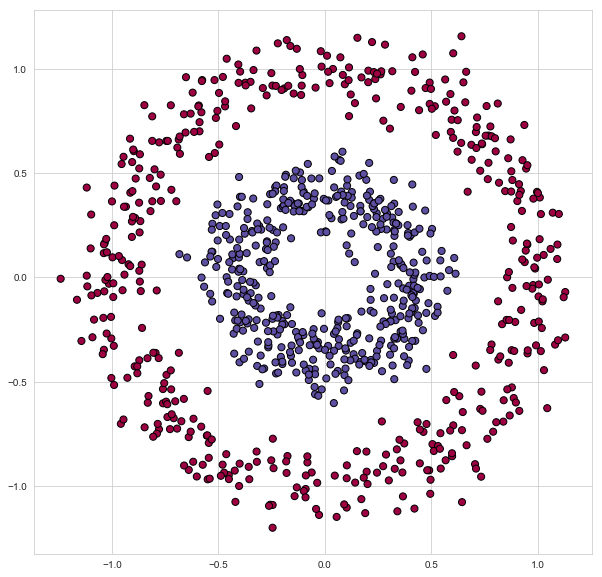

In [28]:
plt.figure(figsize=(10,10))
# sns Seaborn作为一个带着定制主题和高级界面控制的Matplotlib扩展包
sns.set_style("whitegrid") 
# 设置背景为白色网格
plt.scatter(X_train[:, 0], X_train[:, 1], c=y_train.ravel(), s=50, cmap=plt.cm.Spectral, edgecolors='black');
#  c: 点的颜色 接收A sequence of n numbers to be mapped to colors using cmap and norm.  转换y 的格式
# s: 表示  x点的大小 ，可以表示为x的函数
# edgecolors : 边框颜色
# cmap = plt.cm.Spectral实现的功能是给label为1的点一种颜色，给label为0的点另一种颜色。 可以 自定义颜色

plt.savefig("dataset.png")

In [38]:
grid = np.mgrid[GRID_X_START:GRID_X_END:100j,GRID_X_START:GRID_Y_END:100j]
# mgrid 函数 两个放在一起展开成 2维的图形  （2，100，100）  -- 参考 https://www.cnblogs.com/shenxiaolin/p/8854197.html
# 对于 X  相当于 每一列分成100份  为了 形成2D  扩展了100 列 。 适应 Y 的列数
# 对于 Y 相当于 每一行 分成了 100份  扩展了 100 行  适应 X的行数
grid_2d = grid.reshape(2, -1).T
#  转换成 （x,y）== (10000,10000)
X, Y = grid
# 两个 100X100 的矩阵
acc_history = []
loss_history = []

## 辅助函数

In [40]:
# precede the number with zeros, creating a thong of a certain length
# 加0  补全长度
def makeIndexOfLength(index, length):
    indexStr = str(index)
    return ('0' * (length - len(indexStr)) + indexStr)

In [41]:
# the auxiliary function forming graphs of classification boundaries and change of accuracy
# 绘制 二分类  边界的变化 图像

def save_model_prediction_graph(epoch, logs):
    prediction_probs = model.predict_proba(grid_2d, batch_size=32, verbose=0)
    # 初始化的预测 分布
    plt.figure(figsize=(10,10))
    sns.set_style("whitegrid")
    plt.title('Binary classification with KERAS - epoch: ' + makeIndexOfLength(epoch, 3), fontsize=20)
    # epoch 补全成三位数
    
    plt.xlabel('X', fontsize=15)
    plt.ylabel('Y', fontsize=15)
    plt.contourf(X, Y, prediction_probs.reshape(100, 100), alpha = 0.7, cmap=cm.Spectral)
    # 绘制 等高线图
    # 位置参数分别为：X, Y, f(X,Y)。透明度0.75，并将 f(X,Y) 的值对应到color map的spectral中寻找对应颜色。
    plt.scatter(X_train[:, 0], X_train[:, 1], c=y_train.ravel(), s=50, cmap=plt.cm.Spectral, edgecolors='black')
    # 绘制 上文的散点图
    plt.savefig("./" + OUTPUT_DIR + "/keras" + makeIndexOfLength(epoch, 3) + ".png")
    plt.close()
    
    # 绘制 精度图 和损失图
    acc_history.append(logs['acc'])
    loss_history.append(logs['loss'])
    plt.figure(figsize=(12,8))
    sns.set_style("whitegrid")
    plt.plot(acc_history)
    plt.plot(loss_history)
    plt.title('Model accuracy and loss - epoch: ' + makeIndexOfLength(epoch, 3), fontsize=20)
    plt.ylabel('accuracy')
    plt.xlabel('epoch')
    plt.xlim([0,N_EPOCHS])
    plt.legend(['accuracy', 'loss'], loc='upper left')
    plt.savefig("./" + OUTPUT_DIR + "/loss_acc_" + makeIndexOfLength(epoch, 3) + ".png")
    plt.close()

# Keras Solving 

## Model define

In [43]:
# Creating a KERAS model
model = Sequential()
model.add(Dense(4, input_dim=2,activation='relu'))
model.add(Dense(6, activation='relu'))
model.add(Dense(6, activation='relu'))
model.add(Dense(4, activation='relu'))
model.add(Dense(1, activation='sigmoid'))

#Adding callback functions that they will run in every epoch
# 每次循环后  回保存图片
testmodelcb = keras.callbacks.LambdaCallback(on_epoch_end=save_model_prediction_graph)

model.compile(loss='binary_crossentropy', optimizer='adamax', metrics=['accuracy'])

## Train Model

In [45]:
history = model.fit(X_train, y_train, epochs=N_EPOCHS, verbose=1, callbacks=[testmodelcb])
score = model.evaluate(X_test, y_test, verbose=0)
print('Test loss:', score[0])
print('Test accuracy:', score[1])

Epoch 1/50
900/900 [==============================] - 0s 42us/step - loss: 0.5963 - acc: 0.7978
Epoch 2/50
900/900 [==============================] - 0s 43us/step - loss: 0.5800 - acc: 0.8011
Epoch 3/50
900/900 [==============================] - 0s 42us/step - loss: 0.5621 - acc: 0.8178
Epoch 4/50
900/900 [==============================] - 0s 42us/step - loss: 0.5425 - acc: 0.8300
Epoch 5/50
900/900 [==============================] - 0s 37us/step - loss: 0.5230 - acc: 0.8433
Epoch 6/50
900/900 [==============================] - 0s 40us/step - loss: 0.5033 - acc: 0.8489
Epoch 7/50
900/900 [==============================] - 0s 42us/step - loss: 0.4849 - acc: 0.8689
Epoch 8/50
900/900 [==============================] - 0s 42us/step - loss: 0.4666 - acc: 0.8778
Epoch 9/50
900/900 [==============================] - 0s 57us/step - loss: 0.4475 - acc: 0.8833
Epoch 10/50
900/900 [==============================] - 0s 40us/step - loss: 0.4305 - acc: 0.8900
Epoch 11/50
900/900 [==================

# 合成图片
* convert -delay 10 -loop 0 *.png keras_class_boundaries.gif

![title](keras_class_boundaries.gif)


![](keras_loss_acc.gif)

#  How do neural networks learn?

* gradient calculated on each iteration shows us the direction in which we should move.

## Gradient descent visualization

In [46]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

In [47]:
# learning rate
LR = 0.04
# parameters a and b of the real function
REAL_PARAMS = [1.2, 2.5]
# starting point for gradient descent
INIT_PARAMS = [-1, -1.5]
# output directory (the folder must be created on the drive)
OUTPUT_DIR = "gradient_descent"

In [49]:
x = np.linspace(-1, 1, 200, dtype=np.float32)

y_fun = lambda a, b: np.sin(b*np.cos(a*x))
tf_y_fun = lambda a, b: tf.sin(b*tf.cos(a*x))  
# tf  算数操作 tf的sin函数、
# lambda 为 匿名函数  参照 廖雪峰大神 https://www.liaoxuefeng.com/wiki/001374738125095c955c1e6d8bb493182103fac9270762a000/0013868198760391f49337a8bd847978adea85f0a535591000


# 加入噪声
noise = np.random.randn(200)/10
y = y_fun(*REAL_PARAMS) + noise
#  *REAL_PARAMS 若干参数都被放到了tuple元组， 传递参数

a, b = [tf.Variable(initial_value=p, dtype=tf.float32) for p in INIT_PARAMS]
#在 Tensorflow 中，定义了某字符串是变量，它才是变量，这一点是与 Python 所不同的。
# 所以定义了变量以后, 一定要定义 init = tf.initialize_all_variables() .
pred = tf_y_fun(a, b)
mse = tf.reduce_mean(tf.square(y-pred))
train_op = tf.train.GradientDescentOptimizer(LR).minimize(mse)
# 计算损失函数梯度下降 优化 LR   最小化 mse

a_list, b_list, cost_list = [], [], []
# Session 是 Tensorflow 为了控制,和输出文件的执行的语句. 运行 session.run() 可以获得你要得知的运算结果, 或者是你所要运算的部分.
with tf.Session() as sess:
    sess.run(tf.global_variables_initializer())  # 变量初始化
    for t in range(80):
        a_, b_, mse_ = sess.run([a, b, mse])
        a_list.append(a_); b_list.append(b_); cost_list.append(mse_)
        result, _ = sess.run([pred, train_op])


## 可视化

* https://github.com/LiuChuang0059/ILearnDeepLearning.py/blob/master/01_mysteries_of_neural_networks/01_mathematics_of_nn/Gradient%20descent%20visualization.ipynb